In [6]:
from dataclasses import dataclass
from PIL import Image, ImageDraw

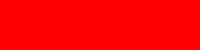

type(im): <class 'PIL.Image.Image'>, background_size: (200, 50)


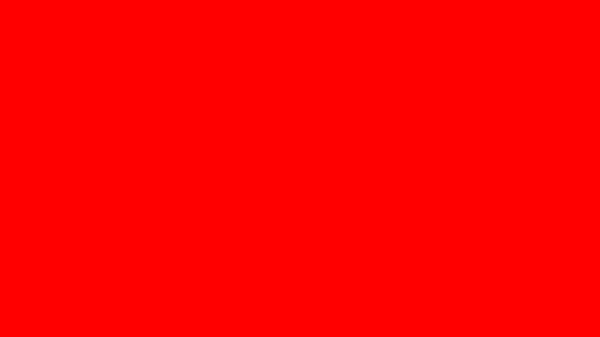

type(im): <class 'PIL.Image.Image'>, background_size: (600, 337)


In [15]:
def draw_case(background_size: (int, int) = [],
              n_rectangles: dict[int, int] = {1, 1},
              width: int = 600,
              aspect_ratio: str = 'widescreen',
              background_color: str = 'white',
              rectangles=(1)):
    
    aspect_ratios = {'standard': 4/3, 'widescreen': 16/9}
    if not background_size:
        width = width
        height = int(width/aspect_ratios[aspect_ratio])
        background_size = (width, height)
        
    im = Image.new(mode='RGB', size=background_size, color=background_color)
    draw = ImageDraw.Draw(im)

    im.save('image1.jpg')
    display(im)
    print(f'type(im): {type(im)}, background_size: {background_size}')
    
draw_case(background_size=(200, 50), background_color='red', rectangles=(1, 1))
draw_case(background_color='red')

In [8]:
@dataclass
class qroestl_case_problem_image():
    pass    